In [134]:
#imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
import plotly
import seaborn as sns
from sklearn import svm

In [8]:
#Reading in data files
df = pd.read_csv('expandedStats.csv',sep=',',header='infer')
dfhr = pd.read_csv('HR.csv',sep=',',header='infer')
dfrbi = pd.read_csv('RBI.csv',sep=',',header='infer')
dfh = pd.read_csv('AVG.csv',sep=',',header='infer')
dfr = pd.read_csv('Runs.csv',sep=',',header='infer')
dfs = pd.read_csv('steals.csv',sep=',',header='infer')

In [9]:
#Sorted in descending order by batting average (AVG)
df.head()

,playerID,yearID,teamID,G,AB,R,H,Doubles,Triples,HR,RBI,SB,SO,Walks HBP,AVG,OBP,SLG,OPS
0,hamiljo03,2010,TEX,133,518,95,186,40,3,32,100,8,95,53,0.359,0.461,0.633,1.095
1,cabremi01,2013,DET,148,555,103,193,26,1,44,137,3,94,114,0.348,0.553,0.636,1.189
2,cabreme01,2012,SFN,113,459,84,159,25,10,11,60,13,63,40,0.346,0.434,0.516,0.950
3,ramirha01,2013,LAN,86,304,62,105,25,2,20,57,10,52,33,0.345,0.454,0.638,1.092
4,morneju01,2010,MIN,81,296,53,102,25,1,18,56,0,62,57,0.345,0.537,0.618,1.155


In [10]:
df.tail()

,playerID,yearID,teamID,G,AB,R,H,Doubles,Triples,HR,RBI,SB,SO,Walks HBP,AVG,OBP,SLG,OPS
1790,flahery01,2015,BAL,91,267,34,54,8,3,9,31,0,81,32,0.202,0.322,0.356,0.678
1791,smoakju01,2014,SEA,80,248,28,50,13,0,7,30,0,66,26,0.202,0.306,0.339,0.645
1792,drewst01,2015,NYA,131,383,43,77,16,1,17,44,0,71,39,0.201,0.303,0.381,0.684
1793,youngch04,2013,OAK,107,335,46,67,18,3,12,40,10,93,41,0.200,0.322,0.379,0.701
1794,bourjpe01,2015,SLN,117,195,32,39,8,3,4,13,5,59,29,0.200,0.349,0.333,0.682


In [11]:
#Getting some more information on the main data set
df.describe()

,yearID,G,AB,R,H,Doubles,Triples,HR,RBI,SB,SO,Walks HBP,AVG,OBP,SLG,OPS
count,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000
mean,2012.498607,123.222841,420.872981,55.205571,112.045682,22.132033,2.349861,12.814485,52.784401,7.996100,85.460724,45.869638,0.263008,0.371011,0.413884,0.784895
std,1.708192,25.600381,130.492513,23.236930,40.428352,9.534240,2.438118,9.242648,24.984873,9.889776,34.534022,23.915723,0.028507,0.051340,0.067545,0.107168
min,2010.000000,76.000000,152.000000,10.000000,33.000000,1.000000,0.000000,0.000000,5.000000,0.000000,17.000000,4.000000,0.200000,0.241000,0.227000,0.474000
25%,2011.000000,101.000000,315.000000,37.000000,80.000000,15.000000,1.000000,6.000000,33.000000,1.000000,59.000000,28.500000,0.243000,0.337000,0.366000,0.712000
50%,2013.000000,126.000000,423.000000,53.000000,110.000000,21.000000,2.000000,11.000000,49.000000,4.000000,82.000000,41.000000,0.262000,0.365000,0.408000,0.773000
75%,2014.000000,147.000000,534.500000,72.000000,144.000000,29.000000,3.000000,18.000000,69.500000,11.000000,106.000000,59.000000,0.283000,0.401000,0.457000,0.847000
max,2015.000000,162.000000,684.000000,136.000000,225.000000,55.000000,16.000000,54.000000,139.000000,68.000000,222.000000,163.000000,0.359000,0.650000,0.649000,1.255000


In [12]:
#Storing players from main data set that have a batting average higher than .320
ba = df[df.AVG > .320]

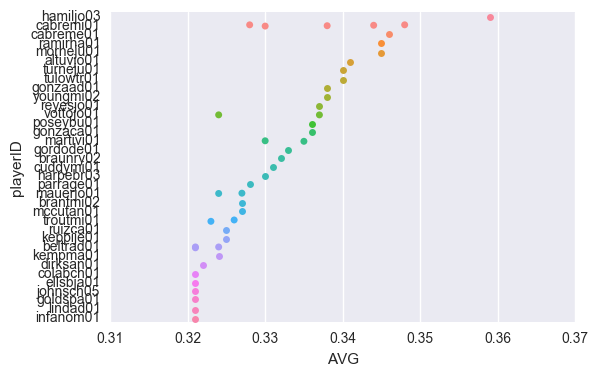

In [13]:
#Visualization of players with the highest batting average
sns.stripplot("AVG","playerID",data=ba, jitter=1)

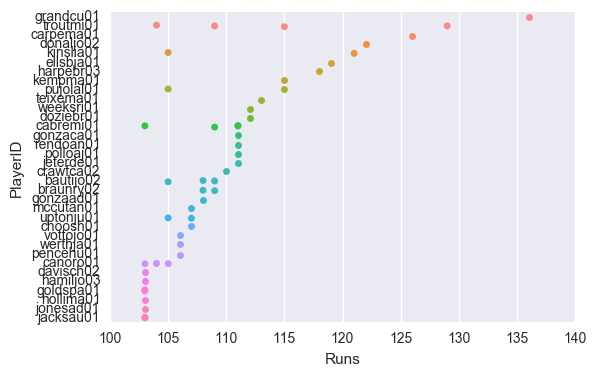

In [14]:
#More Visualizations of various stats
sns.stripplot("Runs","PlayerID",data=dfr, jitter=1)

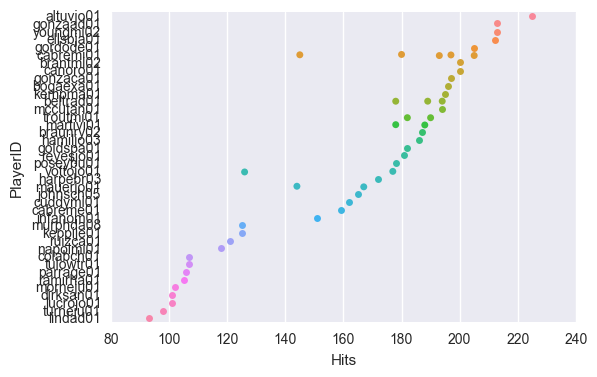

In [15]:
#Ensureing that the dataframe is sorted in descending order by number of hits
dfh = dfh.sort_values('Hits', ascending=False)
sns.stripplot("Hits","PlayerID",data=dfh, jitter=1)

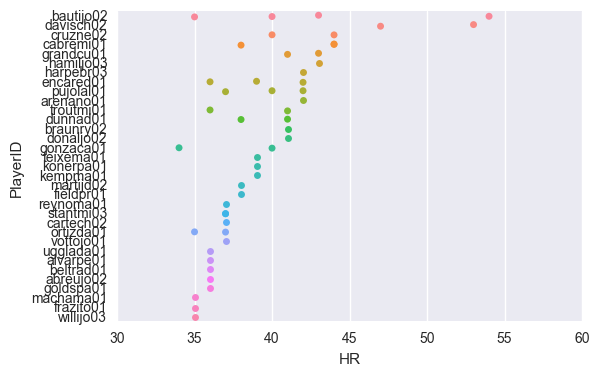

In [16]:
sns.stripplot("HR","PlayerID",data=dfhr, jitter=1)

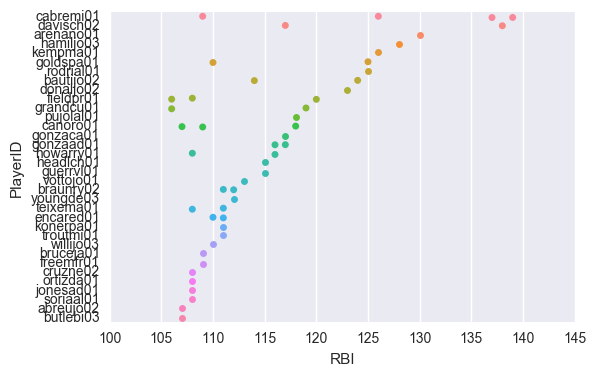

In [17]:
sns.stripplot("RBI","PlayerID",data=dfrbi, jitter=1)

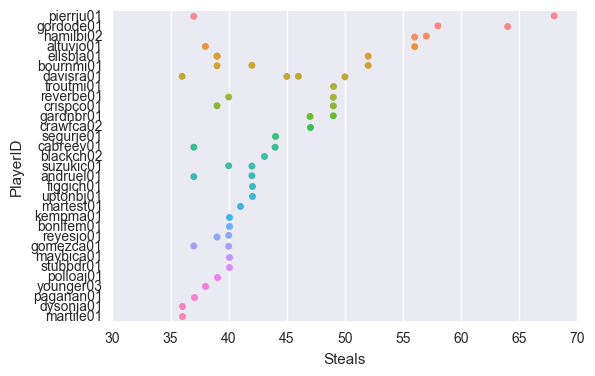

In [18]:
sns.stripplot("Steals","PlayerID",data=dfs, jitter=1)

In [33]:
ba.describe()

,yearID,G,AB,R,H,Doubles,Triples,HR,RBI,SB,SO,Walks HBP,AVG,OBP,SLG,OPS
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,2012.311111,134.822222,501.577778,84.533333,166.111111,33.177778,3.066667,21.888889,82.488889,12.577778,85.533333,69.644444,0.331356,0.470267,0.539778,1.010022
std,1.676336,24.283635,113.606276,24.026122,37.629910,9.388796,3.393845,11.907259,30.307981,16.293458,32.538509,34.710593,0.009185,0.064909,0.061879,0.113564
min,2010.000000,81.000000,288.000000,38.000000,93.000000,15.000000,0.000000,4.000000,31.000000,0.000000,31.000000,25.000000,0.321000,0.380000,0.416000,0.798000
25%,2011.000000,114.000000,429.000000,62.000000,144.000000,25.000000,1.000000,11.000000,56.000000,1.000000,57.000000,48.000000,0.324000,0.421000,0.492000,0.927000
50%,2012.000000,145.000000,540.000000,87.000000,178.000000,33.000000,2.000000,20.000000,84.000000,5.000000,85.000000,59.000000,0.330000,0.457000,0.549000,1.003000
75%,2014.000000,156.000000,589.000000,107.000000,194.000000,40.000000,5.000000,32.000000,105.000000,20.000000,98.000000,95.000000,0.338000,0.517000,0.586000,1.093000
max,2015.000000,161.000000,660.000000,129.000000,225.000000,49.000000,16.000000,44.000000,139.000000,58.000000,159.000000,149.000000,0.359000,0.650000,0.649000,1.255000


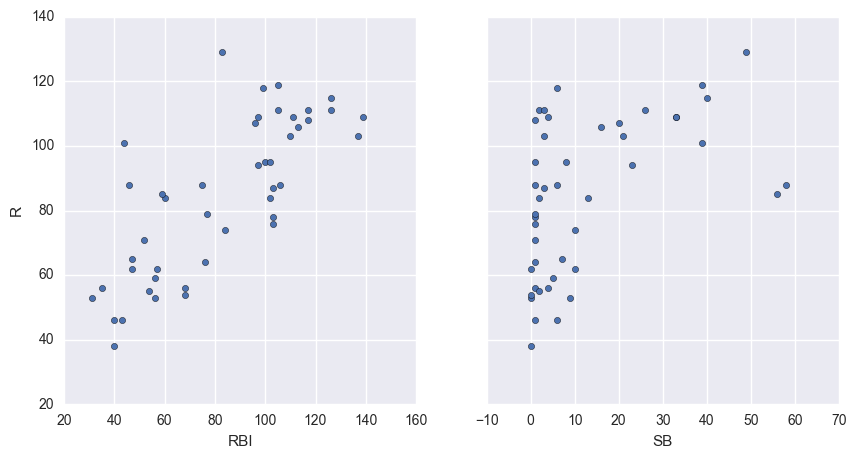

In [34]:
stats, sp = plt.subplots(1, 2, sharey=True)
ba.plot(kind='scatter', x="RBI", y='R', ax=sp[0], figsize=(10, 5))
ba.plot(kind='scatter', x="SB", y="R", ax=sp[1])

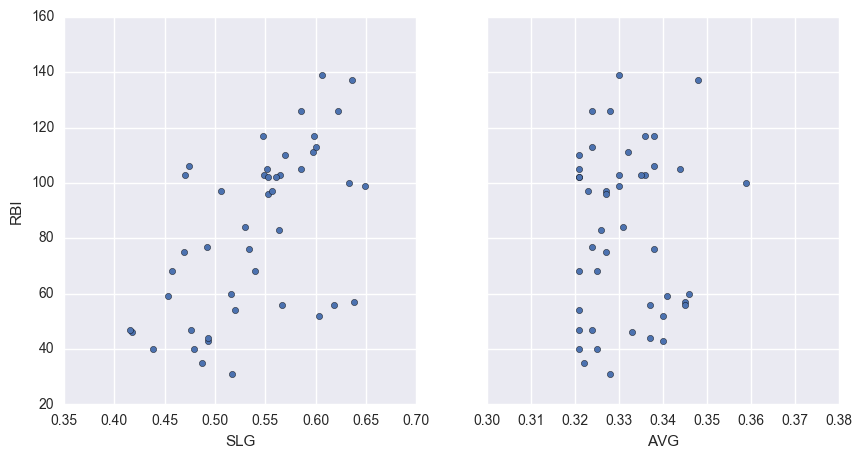

In [50]:
stats, sp = plt.subplots(1, 2, sharey=True)
ba.plot(kind='scatter', x="SLG", y='RBI', ax=sp[0], figsize=(10, 5))
ba.plot(kind='scatter', x="AVG", y="RBI", ax=sp[1])

In [58]:
import statsmodels.formula.api as smf
model = smf.ols(formula='RBI ~ SLG', data=ba).fit()
model.params

Intercept    -69.655663
SLG          281.865163
dtype: float64

In [59]:
new = pd.DataFrame({'SLG':[.80]})
new.head()

,SLG
0,0.8


In [60]:
model.predict(new)

array([ 155.83646806])

In [61]:
new = pd.DataFrame({'SLG': [ba.SLG.min(), ba.SLG.max()]})
new.head()

,SLG
0,0.416
1,0.649


In [62]:
prediction = model.predict(new)
prediction

array([  47.60024534,  113.27482839])

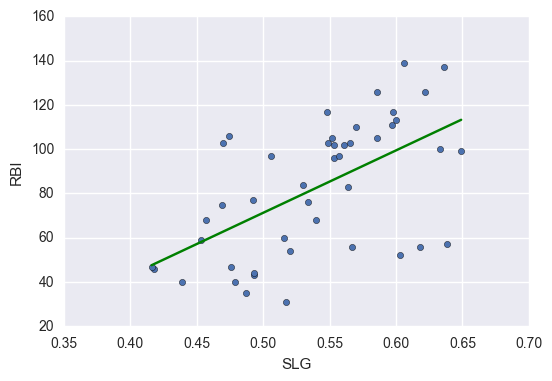

In [63]:
ba.plot(kind='scatter', x ='SLG', y='RBI')
plt.plot(new, prediction, c="green")

In [65]:
# It Appears as if there is some correlation between an individual's
# slugging percentage and the number RBIs that a player gets
# in a given season. 

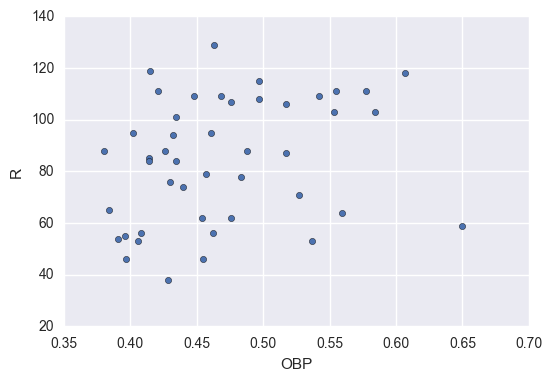

In [66]:
# Now I want to see if there is a similar relationship between 
# OBP (On-base percentage) and the number of runs scored in a 
# season. 
ba.plot(kind='scatter', x="OBP", y='R')

In [68]:
model = smf.ols(formula='R ~ OBP', data=ba).fit()
model.params

Intercept     36.959944
OBP          101.162580
dtype: float64

In [69]:
new = pd.DataFrame({'OBP':[.75]})
new.head()

,OBP
0,0.75


In [70]:
model.predict(new)

array([ 112.83187903])

In [71]:
new = pd.DataFrame({'OBP': [ba.OBP.min(), ba.OBP.max()]})
new.head()

,OBP
0,0.38
1,0.65


In [72]:
prediction = model.predict(new)
prediction

array([  75.40172445,  102.71562104])

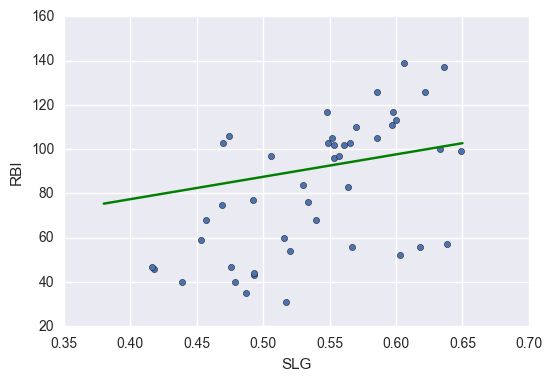

In [73]:
ba.plot(kind='scatter', x ='SLG', y='RBI')
plt.plot(new, prediction, c="green")

In [74]:
# From this graph we can see that there appears to be a weak 
# correlation between an individuals OBP and the number of 
# runs scored in a year.

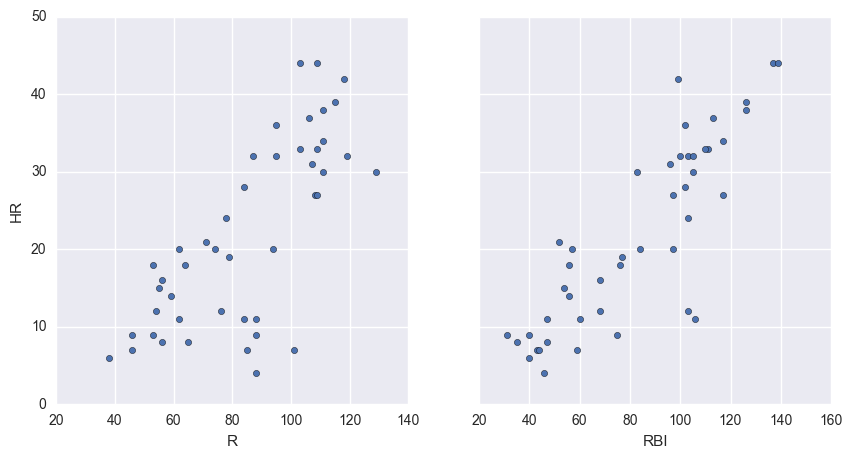

In [75]:
# Now onto Homeruns and their relations to Runs scored and Runs 
# batted in. We would expect a high correlation for both categories
stats, sp = plt.subplots(1, 2, sharey=True)
ba.plot(kind='scatter', x="R", y='HR', ax=sp[0], figsize=(10, 5))
ba.plot(kind='scatter', x="RBI", y="HR", ax=sp[1])

In [77]:
#Relation between Home runs and rbis
model = smf.ols(formula='RBI ~ HR', data=ba).fit()
model.params

Intercept    34.635550
HR            2.186193
dtype: float64

In [78]:
#Relation between Home runs and runs
model1 = smf.ols(formula='R ~ HR', data=ba).fit()
model1.params

Intercept    51.903505
HR            1.490703
dtype: float64

In [79]:
new = pd.DataFrame({'HR':[50]})
new.head()

,HR
0,50


In [80]:
#RBI model
model.predict(new)

array([ 143.94520714])

In [81]:
#Runs model
model1.predict(new)

array([ 126.43864567])

In [82]:
new = pd.DataFrame({'HR': [ba.HR.min(), ba.HR.max()]})
new.head()

,HR
0,4
1,44


In [83]:
#RBI Prediction
prediction = model.predict(new)
prediction

array([  43.38032273,  130.8280483 ])

In [84]:
#Runs prediction
prediction1 = model1.predict(new)
prediction1

array([  57.86631639,  117.49442881])

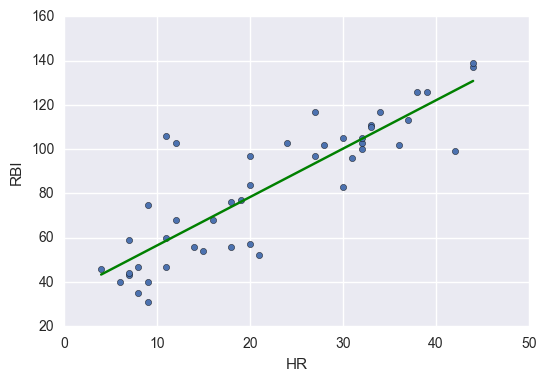

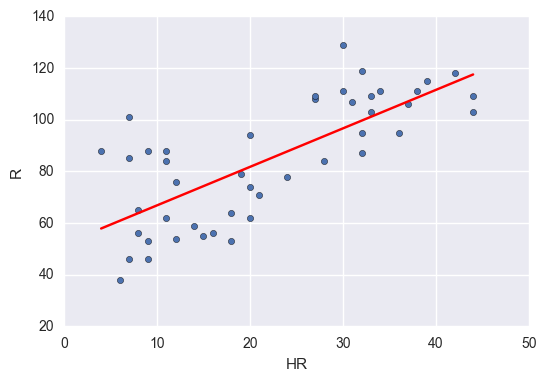

In [91]:
ba.plot(kind='scatter', x="HR", y='RBI')
plt.plot(new, prediction, c="green")
ba.plot(kind='scatter', x ='HR', y='R')
plt.plot(new, prediction1, c="red")

In [104]:
model.conf_int()

,0,1
Intercept,24.671214,44.599887
HR,1.785289,2.587097


In [93]:
model1.conf_int()

,0,1
Intercept,41.508943,62.298068
HR,1.072489,1.908916


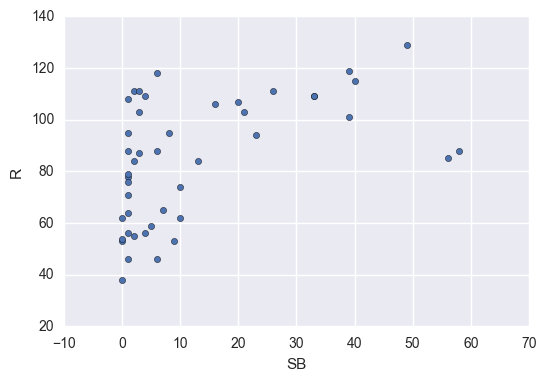

In [106]:
#Now checking the number of stolen bases and runs scored
ba.plot(kind='scatter', x="SB", y="R")

In [107]:
model = smf.ols(formula='R ~ SB', data=ba).fit()
model.params

Intercept    75.342920
SB            0.730687
dtype: float64

In [108]:
new = pd.DataFrame({'SB':[70]})
new.head()

,SB
0,70


In [109]:
model.predict(new)

array([ 126.49097869])

In [110]:
new = pd.DataFrame({'SB': [ba.SB.min(), ba.SB.max()]})
new.head()

,SB
0,0
1,58


In [111]:
prediction = model.predict(new)
prediction

array([  75.3429203 ,  117.72274011])

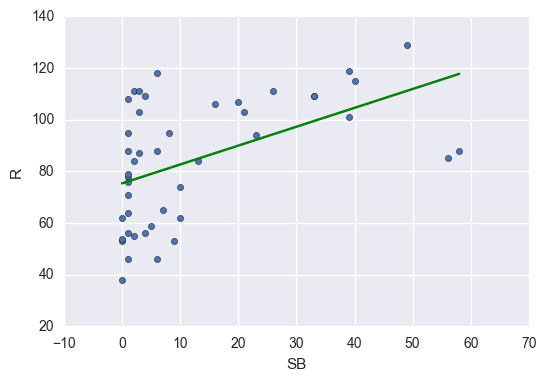

In [112]:
ba.plot(kind='scatter', x="SB", y='R')
plt.plot(new, prediction, c="green")

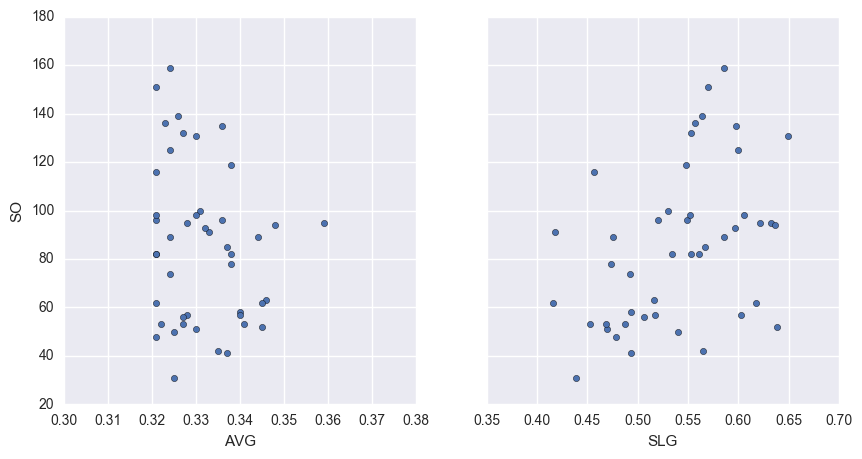

In [113]:
stats, sp = plt.subplots(1, 2, sharey=True)
ba.plot(kind='scatter', x="AVG", y='SO', ax=sp[0], figsize=(10, 5))
ba.plot(kind='scatter', x="SLG", y="SO", ax=sp[1])

In [121]:
model = smf.ols(formula='AVG ~ SO', data=ba).fit()
model.params

Intercept    0.335882
SO          -0.000053
dtype: float64

In [117]:
new = pd.DataFrame({'SO':[175]})
new.head()

,SO
0,175


In [118]:
model1 = smf.ols(formula='SLG ~ SO', data=ba).fit()
model1.params

Intercept    0.471083
SO           0.000803
dtype: float64

In [122]:
#Predicted batting average
model.predict(new)

array([ 0.32662051])

In [120]:
#Predicted slugging percentage
model1.predict(new)

array([ 0.61163184])

In [123]:
new = pd.DataFrame({'SO': [ba.SO.min(), ba.SO.max()]})
new.head()

,SO
0,31
1,159


In [124]:
prediction = model.predict(new)
prediction

array([ 0.33424175,  0.32746731])

In [125]:
prediction1 = model1.predict(new)
prediction1

array([ 0.49598   ,  0.59878163])

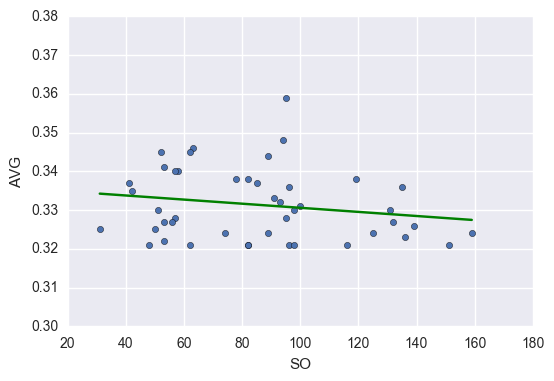

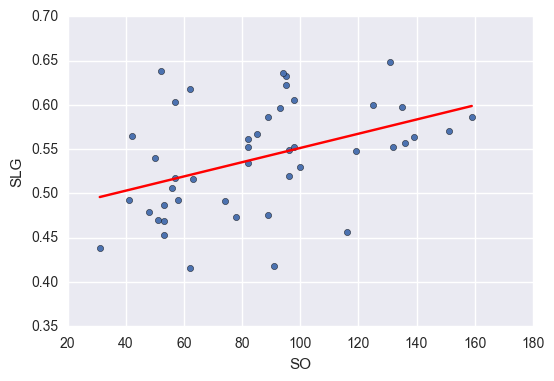

In [127]:
ba.plot(kind='scatter', x="SO", y='AVG')
plt.plot(new, prediction, c="green")
ba.plot(kind='scatter', x ='SO', y='SLG')
plt.plot(new, prediction1, c="red")

In [128]:
ba.head()

,playerID,yearID,teamID,G,AB,R,H,Doubles,Triples,HR,RBI,SB,SO,Walks HBP,AVG,OBP,SLG,OPS
0,hamiljo03,2010,TEX,133,518,95,186,40,3,32,100,8,95,53,0.359,0.461,0.633,1.095
1,cabremi01,2013,DET,148,555,103,193,26,1,44,137,3,94,114,0.348,0.553,0.636,1.189
2,cabreme01,2012,SFN,113,459,84,159,25,10,11,60,13,63,40,0.346,0.434,0.516,0.950
3,ramirha01,2013,LAN,86,304,62,105,25,2,20,57,10,52,33,0.345,0.454,0.638,1.092
4,morneju01,2010,MIN,81,296,53,102,25,1,18,56,0,62,57,0.345,0.537,0.618,1.155


/Users/Captainslog/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.



ValueError: Found input variables with inconsistent numbers of samples: [1, 45]